In [259]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [260]:
data = pd.read_csv('data/komeng_clean.csv')
data

,full_text
0,yang ketawa ngerti maksud komeng kah itu
1,goblok sj kalau komeng di bagian pertanian su...
2,sudah tepat pak komeng bicara demikian seharu...
3,ketika sudah di bidang yang lain komeng sebelu...
4,gas terus bang komeng suara pendukung mu lebi...
...,...
837,klo komeng mundur berarti pemerintah lebih la...
838,secara tidak langsung komeng meng kritik peme...
839,pertanyaan bang komeng emang cerdas mana ada ...
840,orang kerja di kantor itu harus ada ijazah pe...


In [261]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy'])
stopwords = list_stopwords

In [262]:
data = data.full_text.to_list()
data[:10]

['yang ketawa ngerti maksud komeng kah itu',
 ' goblok sj kalau komeng di bagian pertanian sumpah tolol itu pimpinan busuk',
 ' sudah tepat pak komeng bicara demikian seharusnya beliau ditempatkan sesuai kemampuannya',
 'ketika sudah di bidang yang lain komeng sebelumnya komedian sekarang ada di dewan harusnya jangan disatukan lah kocak juga ',
 ' gas terus bang komeng suara pendukung mu lebih banyak dari mereka semuaaaa',
 ' udah terima aja pak komeng dan buat para petani ceria walau gagal panen walau susah pupuk bikin mereka tetap ceria dalam menerima takdirnya sebagai petani  mungkin maksud mereka begitu ',
 'gue jadi komeng bakal marah besar di komite ii biar ada hiburan  wdym gue ke senat untuk jadi wakil rakyat suara gue terbanyak kok bisabisanya lo jadiin gue badut komeng deserves the place to represents his people in senate',
 ' meng komeng anda anggota drwan tingkat nasional cobalah dg jiwa senimu menyuarakan kepentingan masyarakat jabar jabar juga dikenal sbg daerah pertanian

In [263]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data[:100])

In [264]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_init=1)

In [265]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 bang
 komeng
 mbois
 kerenn
 ihh
 pemerintahan
 nang
 maju
 komenguhuy
 mantap

Cluster 1:
 yg
 org
 ini
 komeng
 bidangnya
 aja
 ada
 bukan
 bang
 emang

Cluster 2:
 nathan
 el
 ahmed
 rcti
 klemer
 kaf
 arab
 shayne
 fifa
 al

Cluster 3:
 di
 hiburan
 komeng
 komite
 dpd
 lawan
 masuk
 buat
 komisi
 dgn

Cluster 4:
 pak
 mau
 luar
 biasa
 kemampuannya
 di
 bukan
 itulah
 harus
 seperti

Cluster 5:
 itu
 tuh
 sarkas
 komeng
 ngerti
 di
 protes
 bang
 sini
 pertanian

Cluster 6:
 yang
 dan
 komeng
 di
 pada
 berada
 keren
 bikin
 ada
 bang

Cluster 7:
 lucu
 lebih
 komeng
 dari
 pimpinannya
 yg
 bgt
 kalah
 suara
 bkn



In [266]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters.
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

np.float64(0.01427193862098309)

In [267]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

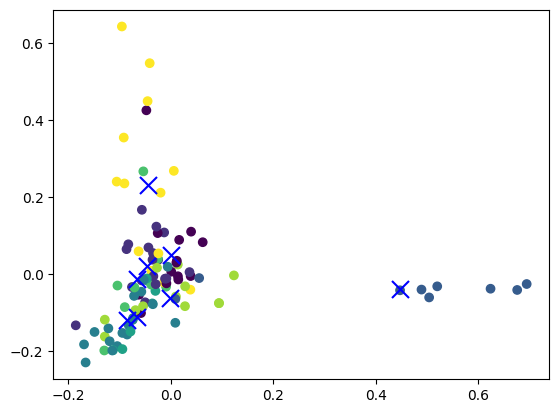

In [268]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')